## N차 과제 - Time Series Analysis_주가예측

- 주제: 시계열 모델을 주가 데이터에 대한 시계열 예측 및 분석
- 데이터: 주식 데이터(크롤링 or 라이브러리로 데이터 불러오기)
- 사용 라이브러리: yfinance, datareader, statsmodels, matplotlib etc.

In [197]:
pip install yfinance

In [198]:
import pandas as pd
from pandas_datareader import data as pdf
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose


### 1. EDA 및 전처리

1.1 분석을 위해 사용할 특정 주식(1개)의 데이터를 불러오거나 크롤링하여 가져오세요(**최소 3년 이상의 데이터 추출 권고**).

In [199]:
df = yf.download('GOOG', start = '2019-01-01', end = '2024-01-01').reset_index()
df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,50.828499,52.616001,50.785500,52.292500,52.164394,30652000
1,2019-01-03,52.049999,52.848999,50.703499,50.803001,50.678543,36822000
2,2019-01-04,51.629501,53.542000,51.370899,53.535500,53.404346,41878000
3,2019-01-07,53.575001,53.700001,52.737999,53.419498,53.288631,39638000
4,2019-01-08,53.805500,54.228001,53.026501,53.813999,53.682163,35298000
...,...,...,...,...,...,...,...
1253,2023-12-22,142.130005,143.250000,142.054993,142.720001,142.370361,18494700
1254,2023-12-26,142.979996,143.945007,142.500000,142.820007,142.470123,11170100
1255,2023-12-27,142.830002,143.320007,141.050995,141.440002,141.093506,17288400
1256,2023-12-28,141.850006,142.270004,140.828003,141.279999,140.933899,12192500


1.2 결측치가 있는지 확인하고 있다면 제거해주세요.

In [200]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [201]:
# 결측치 없음
# 결측치 있으면 아래 코드 실행하면 결측치가 있는 행 제거 가능
# df.dropna(axis=0)

1.3 일자를 인덱스로 설정하고 시간 순서대로 정렬하세요.

In [202]:
df.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [203]:
df = df.set_index(['Date'])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,50.828499,52.616001,50.785500,52.292500,52.164394,30652000
2019-01-03,52.049999,52.848999,50.703499,50.803001,50.678543,36822000
2019-01-04,51.629501,53.542000,51.370899,53.535500,53.404346,41878000
2019-01-07,53.575001,53.700001,52.737999,53.419498,53.288631,39638000
2019-01-08,53.805500,54.228001,53.026501,53.813999,53.682163,35298000


In [204]:
df = df.sort_index()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,50.828499,52.616001,50.785500,52.292500,52.164394,30652000
2019-01-03,52.049999,52.848999,50.703499,50.803001,50.678543,36822000
2019-01-04,51.629501,53.542000,51.370899,53.535500,53.404346,41878000
2019-01-07,53.575001,53.700001,52.737999,53.419498,53.288631,39638000
2019-01-08,53.805500,54.228001,53.026501,53.813999,53.682163,35298000
...,...,...,...,...,...,...
2023-12-22,142.130005,143.250000,142.054993,142.720001,142.370361,18494700
2023-12-26,142.979996,143.945007,142.500000,142.820007,142.470123,11170100
2023-12-27,142.830002,143.320007,141.050995,141.440002,141.093506,17288400


1.4 수정종가(adj close)와 거래량(volume)을 시각화하세요.

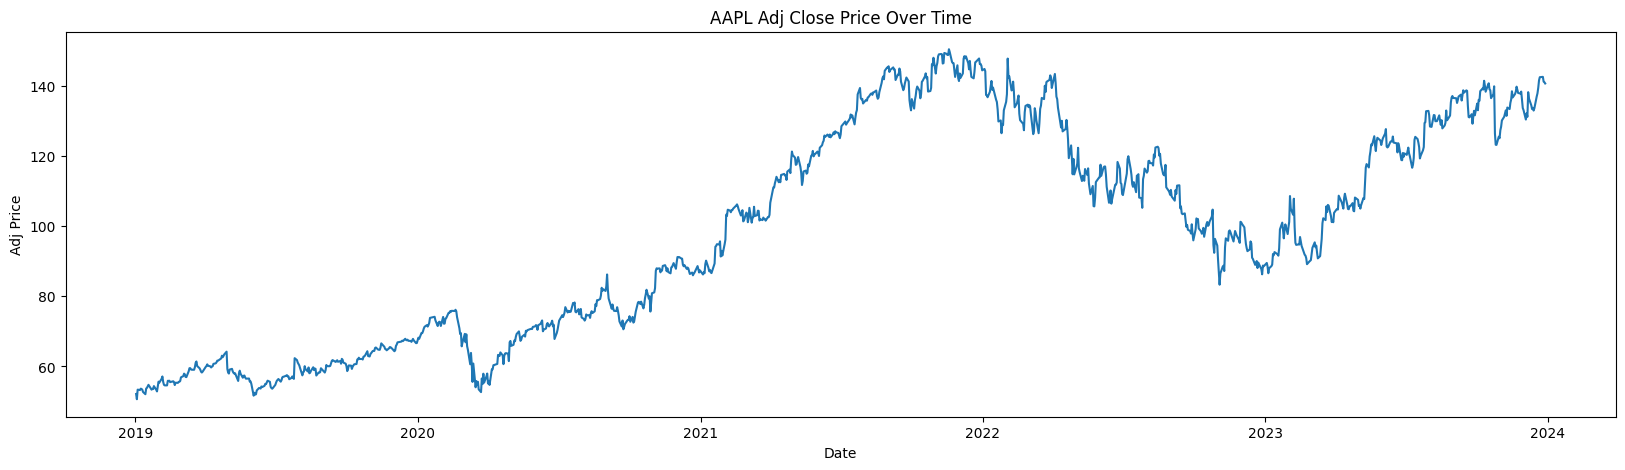

In [205]:
plt.figure(figsize = (20, 5))
plt.plot(df['Adj Close'], label = 'AAPL Adj Close Price')
plt.xlabel('Date')
plt.ylabel('Adj Price')
plt.title('AAPL Adj Close Price Over Time')
plt.show()

Text(0.5, 1.0, 'AAPL Volume Over Time')

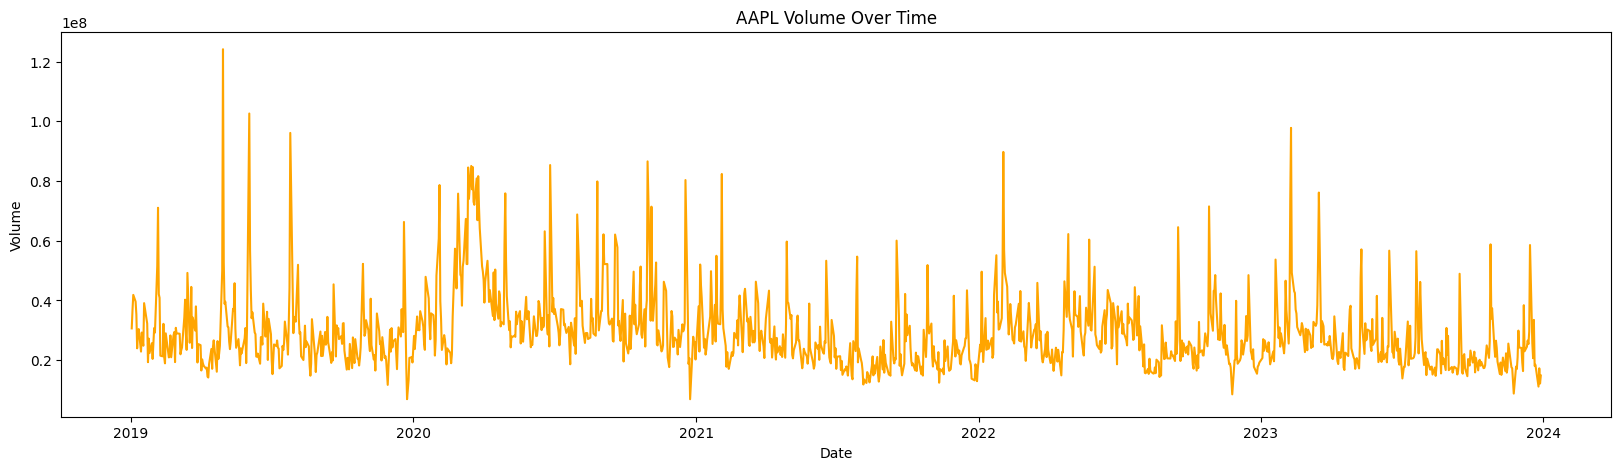

In [206]:
plt.figure(figsize = (20, 5))
plt.plot(df['Volume'], color = 'orange', label = 'AAPL Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('AAPL Volume Over Time')

1.5 위 시각화 과정을 통해 알 수 있는 내용에 대해 작성하세요.

**수정종가**
- 수정 종가는 장기간에 걸쳐 다양한 자산의 수익률을 비교할 때 필수적
- 장기적 관점에서 자산 배분을 고려하면 수정 종가를 이용해 과거 수익률을 정확하게 평가할 수 있음  


**거래량**
- 거래량의 변동성을 보면 특정 기간(ex.2022년도 초중순/ 2023년 초중순)에 급등함을 보이는데 이때 특별한 이벤트가 있어서 거래량이 급격하게 상승한 것이라고 보임
- => 2023년도 3월에 급등할만한 이벤트가 있었음


### 2. 추세 및 정상성 검정

2.1 시계열 데이터의 정상성을 검증하도록 하겠습니다. 시계열 데이터 말하는 정상성(stationarity)이 무엇인지 왜 해야 하며 비정상성의 해결 방법에는 무엇이 있는지 작성하세요.

**정상성**
- 시계열 데이터가 시점에 따라 평균이나 분산 같은 통계적 특징이 변하지 않으며 추세나 계절성이 없는 시계열 데이터를 의미한다.
- 비정상성이라면 평균과 분산이 달라 임의의 시점 t-1, t에서 얻은 모델은 t+1~t+n에서 사용할 수 없게 된다.
- => 미래의 값을 예측할 수 없다.

**비정상성 해결 방법**
1. 차분
- 연속된 관측치 간의 차이 계산
- 시계열 데이터의 트렌드나 계절성 제거에 유용
- 구현이 간단함

2. Box-Cox 변환
- 로그 변환의 일반화된 형태로 데이터를 더 정규 분포에 가깝게 만듦
- 데이터의 비대칭성(왜도)를 줄이고, 분산의 안정화 도모

3. 계절성 차분
- 특정 계절적 패턴을 갖는 시계열 데이터에서 계절성을 제거하기 위해 사용
- 계절성 패턴 외의 다른 비정상성 요소는 제거 못할 수도 있음

2.2 먼저 ADF Test를 수행하겠습니다. statsmodels의 adfuller 라이브러리를 import 한 후 수정 종가에 대한 검정을 수행하고 결과를 출력하세요(p-value 포함).

ADF Test란? - https://hongl.tistory.com/98

In [207]:
from statsmodels.tsa.stattools import adfuller

In [208]:
result = adfuller(df['Adj Close'])

print(f'ADF Statistic : {result[0]}')
print(f'p-value {result[1]}')

ADF Statistic : -1.2410898709884068
p-value 0.6556749705854388


In [209]:
# crtical values 출력하는 방법
print('critical values: ')
for key, value in result[4].items() :
      print(f'\t{key}{value}')

critical values: 
	1%-3.4355671297788666
	5%-2.8638438984080117
	10%-2.5679966213893057


2.3 ADF Test 결과를 해석하세요.

**ADF Test 결과 해석**
- **ADF statistics** : 음수일수록 시계열 데이터가 안정적임
- **p-value** : 귀무가설이 맞을 확률
- => 0.05보다 작으면 귀무가설 기각하고 시계열 데이터가 안정적이라는 결론
- => 0.05보다 크면 귀무가설을 기각하지 못하고 시계열 데이터가 불안정하다고 판단

***=> 결론 : ADF 통계량이 낮지 않고 p-value가 높기에 해당 시계열 데이터는 정상성을 갖지 않는다.***

2.4 ACF 그래프와 PACF 그래프를 그려보도록 하겠습니다. 먼저 ACF와 PACF 각각이 어떻게 다른지 설명하세요.

**ACF (자기상관함수)**
- k 시간 단위로 구분된 시계열 관측치 간의 y(t)와 y(t+k)간 상관관계 측정
- 반환값의 절대값이 커질수록 시차 시계열 데이터의 상관성이 큼 => p-value
- 정상성 데이터에서는 0으로 빠르게 떨어지고 비정상성 데이터에서는 천천히 떨어진다  

**PACF**
- y(t)와 y(t-1)이 관계가 있다면 y(t-1)와 y(t-2)도 상관이 있다는 것
- => ACF가 모든 시계열 데이터 특성을 분석하는데 한계가 있어 추가적인 분석으로 사용
- 부분 상관 : 확률 변수 X와 Y에 의해 모든 변수들에 대한 상관 관계를 분석한 후에도 남아있는 상관관계 해석
- y(t)와 y(t+k)간 상관관계 도출은 같으나 t와 t+k간 다른 y값의 영향력은 배제하고 측정

2.5 statsmodels의 plot_acf, plot_pacf 라이브러리를 import하고 Adj close값에 대한 ACF, PACF 그래프를 출력하세요.

In [210]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

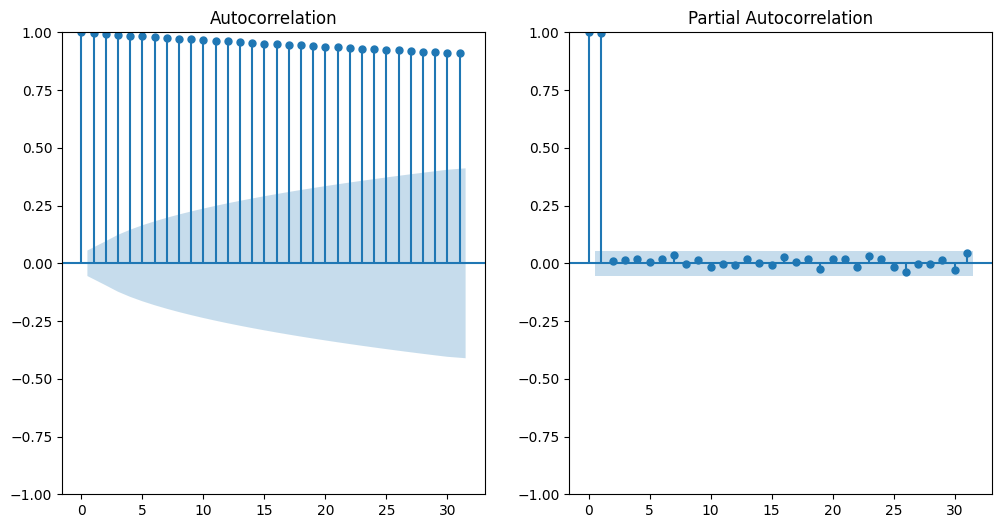

In [211]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6)) # 두 개의 그래프를 한 번에 그리기 위해

plot_acf(df['Adj Close'], ax = axes[0])
plot_pacf(df['Adj Close'], ax = axes[1])
plt.show()

2.6 결과를 해석하세요.

**ACF**
- 천천히 감소되는 것을 보면 주식 데이터는 주기에 따라 일정하지 않은 비정상성 데이터
- 초반부에 상관계수가 높은 양수값을 유지함 => 강한 추세
- 파란색 음영 부분은 신뢰구간을 나타내며 신뢰구간을 벗어난 점들은 유의미한 상관성을 가진다 => 비정상적 데이터

**PACF**
- 처음 2개 데이터 이후 파란 박스에 들어가면서 그래프가 끊기는 것을 보면 AR(1) 모형 활용이 적절하다
- => 첫 번째 시차까지만 자기 상관성이 중요하고 이후에는 거의 영향을 미치지 않음

**AR(1) 모델**
- 현재 시점의 데이터가 바로 이전 시점의 데이터에만 의존
- 시간의 흐름에 따라 예측하는 방법

2.7 마지막으로 계절성이 있는지 여부를 확인하겠습니다. statsmodels의 seasonal_decompose 라이브러리를 import하고 plot을 출력하세요.

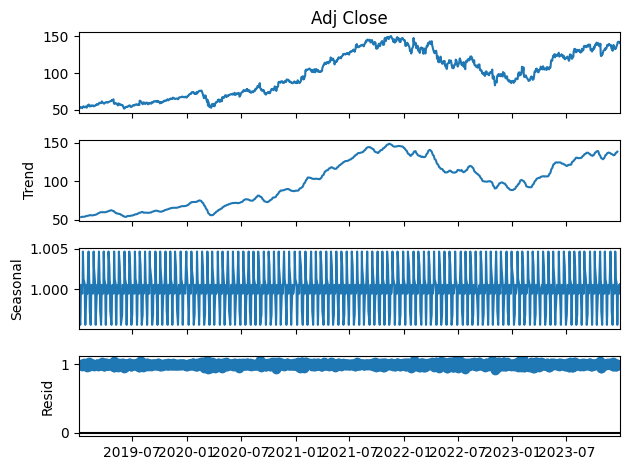

In [212]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_result = seasonal_decompose(df['Adj Close'], model = 'multiplicative', period = 12) # 곱하기(승법적) 분해된 구성요소

decomposition_result.plot()
plt.show()

2.8 위 결과를 해석하세요.

- Trend가 지속적으로 상승하는 것을 봤을 때 주가의 추세가 우상향함
- Seasonal의 반복적인 패턴의 크기와 주기를 통해 계절성 변동을 이해할 있다. 계절성이 크므로 주기적인 영향이 강하다는 것을 의미한다.
- Resid는 불규칙성으로 추세와 계절성을 제외한 예측할 수 없는 변동성이다. 이게 대부분 1인것을 볼 때 trend와 seasonal로 설명되지 않는 변동이 크다는 것을 의미한다.

2.9 위에서 진행한 검정 과정 및 시각화 결과를 종합해봤을 때 현 데이터는 비정상성임을 알 수 있습니다. 따라서 차분을 통해 이를 해결하도록 하겠습니다. 먼저 차분이 어떤 것인지에 대해 설명하세요.

- 차분 : 관측 값들의 차이를 계산

2.10 1차 차분을 진행하도록 하겠습니다. diff() 함수를 활용해 1차 차분을 진행한 후 ADF Test를 수행하여 정상성 여부를 확인하세요.

In [213]:
df['Adj_diff_1'] = df['Adj Close'].diff(1)
df

,Open,High,Low,Close,Adj Close,Volume,Adj_diff_1
Date,,,,,,,
2019-01-02,50.828499,52.616001,50.785500,52.292500,52.164394,30652000,NaN
2019-01-03,52.049999,52.848999,50.703499,50.803001,50.678543,36822000,-1.485851
2019-01-04,51.629501,53.542000,51.370899,53.535500,53.404346,41878000,2.725803
2019-01-07,53.575001,53.700001,52.737999,53.419498,53.288631,39638000,-0.115715
2019-01-08,53.805500,54.228001,53.026501,53.813999,53.682163,35298000,0.393532
...,...,...,...,...,...,...,...
2023-12-22,142.130005,143.250000,142.054993,142.720001,142.370361,18494700,0.917740
2023-12-26,142.979996,143.945007,142.500000,142.820007,142.470123,11170100,0.099762
2023-12-27,142.830002,143.320007,141.050995,141.440002,141.093506,17288400,-1.376617


In [214]:
# diff_1에서의 NaN 제거
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,Adj_diff_1
Date,,,,,,,
2019-01-03,52.049999,52.848999,50.703499,50.803001,50.678543,36822000,-1.485851
2019-01-04,51.629501,53.542000,51.370899,53.535500,53.404346,41878000,2.725803
2019-01-07,53.575001,53.700001,52.737999,53.419498,53.288631,39638000,-0.115715
2019-01-08,53.805500,54.228001,53.026501,53.813999,53.682163,35298000,0.393532
2019-01-09,54.082500,54.131500,53.320000,53.733002,53.601364,23986000,-0.080799
...,...,...,...,...,...,...,...
2023-12-22,142.130005,143.250000,142.054993,142.720001,142.370361,18494700,0.917740
2023-12-26,142.979996,143.945007,142.500000,142.820007,142.470123,11170100,0.099762
2023-12-27,142.830002,143.320007,141.050995,141.440002,141.093506,17288400,-1.376617


In [215]:
result = adfuller(df['Adj_diff_1'])

print(f'ADF Statistic : {result[0]}')
print(f'p-value {result[1]}')

ADF Statistic : -36.95515464680637
p-value 0.0


2.11 추가로 위에서 그려보았던 plot들을 다시 그려보면서 비교를 통해 정상성 여부를 확인해보도록 하겠습니다. ACF PACF plot, 계절성 분해 plot을 그려보세요.

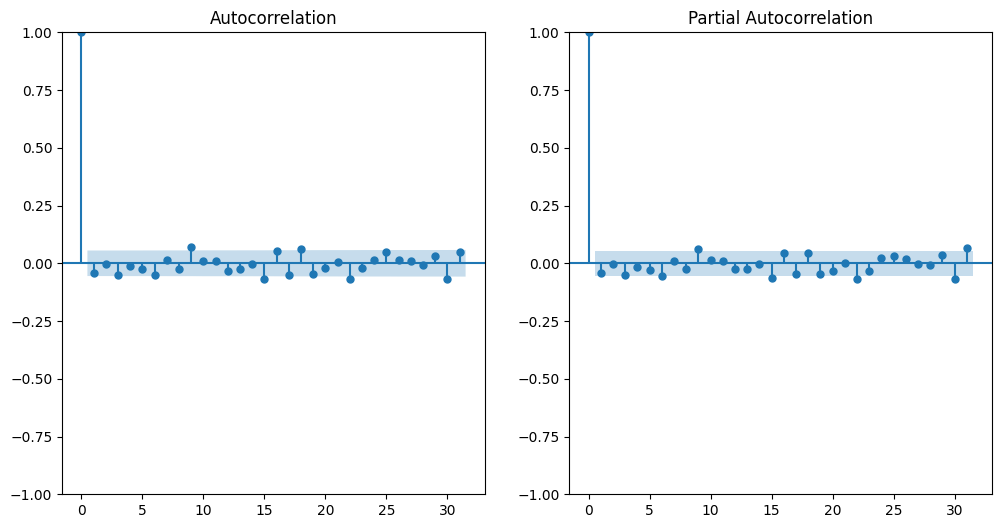

In [216]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6)) # 두 개의 그래프를 한 번에 그리기 위해

plot_acf(df['Adj_diff_1'], ax = axes[0])
plot_pacf(df['Adj_diff_1'], ax = axes[1])
plt.show()

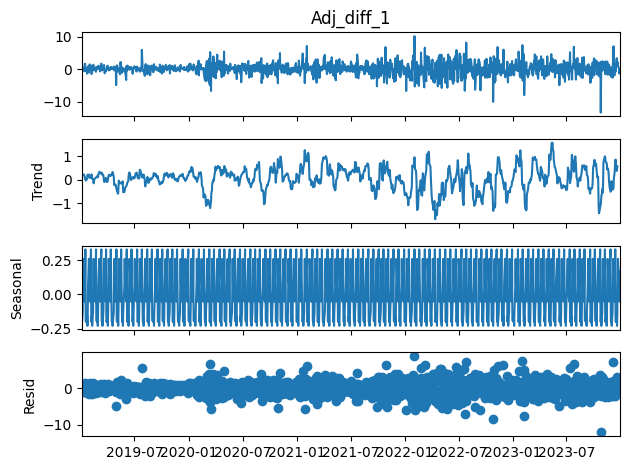

In [217]:
decomposition_result = seasonal_decompose(df['Adj_diff_1'], model = 'additive', period = 12) # 더하기(가법적) 분해된 구성요소 / 곱하기 하니까 0이 많아서 안 됨

decomposition_result.plot()
plt.show()

### 3. 예측

3.1 데이터의 정상성을 확인했으니 본격적으로 예측 및 분석을 진행해보도록 하겠습니다.

아래 코드는 예시이므로 예시에서 사용된 모델이 아닌 다른 모델(ex. ARIMAX, ARCH/GARCH, LSTM, Transformer, DLinear etc.)를 사용하고 애플이 아닌 다른 주식을 사용해 예측 및 분석을 진행해주세요(**위에서 진행한 과정 역시 모두 예시이므로 새로운 주식에 대한 전처리 및 정상성 검정을 새로 진행해야 함**).

In [218]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [219]:
df

,Open,High,Low,Close,Adj Close,Volume,Adj_diff_1
Date,,,,,,,
2019-01-03,52.049999,52.848999,50.703499,50.803001,50.678543,36822000,-1.485851
2019-01-04,51.629501,53.542000,51.370899,53.535500,53.404346,41878000,2.725803
2019-01-07,53.575001,53.700001,52.737999,53.419498,53.288631,39638000,-0.115715
2019-01-08,53.805500,54.228001,53.026501,53.813999,53.682163,35298000,0.393532
2019-01-09,54.082500,54.131500,53.320000,53.733002,53.601364,23986000,-0.080799
...,...,...,...,...,...,...,...
2023-12-22,142.130005,143.250000,142.054993,142.720001,142.370361,18494700,0.917740
2023-12-26,142.979996,143.945007,142.500000,142.820007,142.470123,11170100,0.099762
2023-12-27,142.830002,143.320007,141.050995,141.440002,141.093506,17288400,-1.376617


In [220]:
sarimax = SARIMAX(df['Adj Close'], order = (2, 1, 3), seasonal_order = (1, 1, 2, 14)).fit(disp=False)
forecast = sarimax.forecast(steps=200)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python

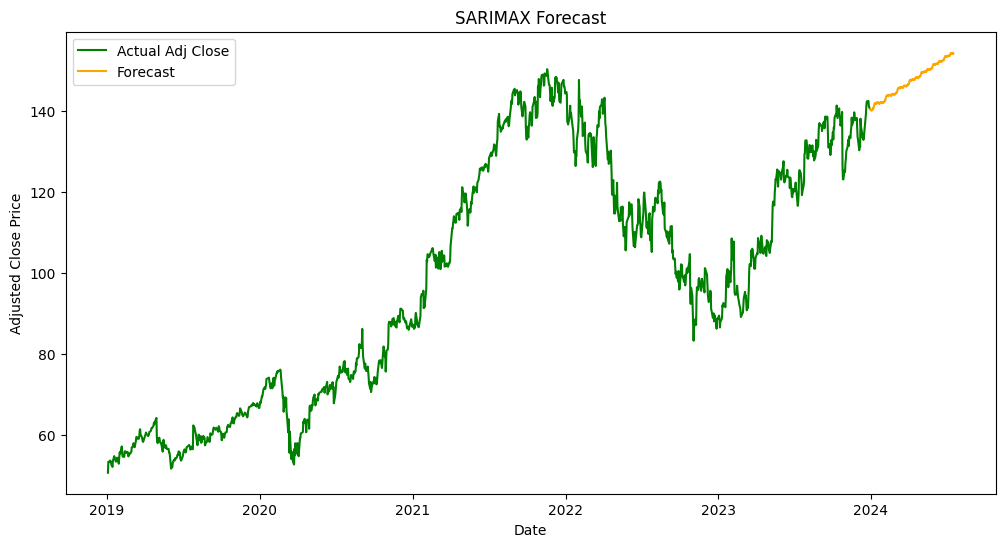

In [221]:
plt.figure(figsize= (12, 6))
plt.plot(df.index, df['Adj Close'], label = 'Actual Adj Close', color = 'green')

forecast_index = pd.date_range(start=df.index[-1]+ pd.Timedelta(days=1), periods=200, freq = 'D')
plt.plot(forecast_index, forecast, label = 'Forecast', color = 'orange')
plt.title('SARIMAX Forecast')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

In [222]:
#실제 데이터 가져오기
actual_data_last_200 = yf.download('GOOG', start='2024-01-01', end='2024-10-01')
actual_last_200 = actual_data_last_200[['Close']]
actual_last_200

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2024-01-02,139.559998
2024-01-03,140.360001
2024-01-04,138.039993
2024-01-05,137.389999
2024-01-08,140.529999
...,...
2024-09-24,163.639999
2024-09-25,162.990005
2024-09-26,163.830002


In [223]:
forecast_result = sarimax.get_forecast(steps=200)
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


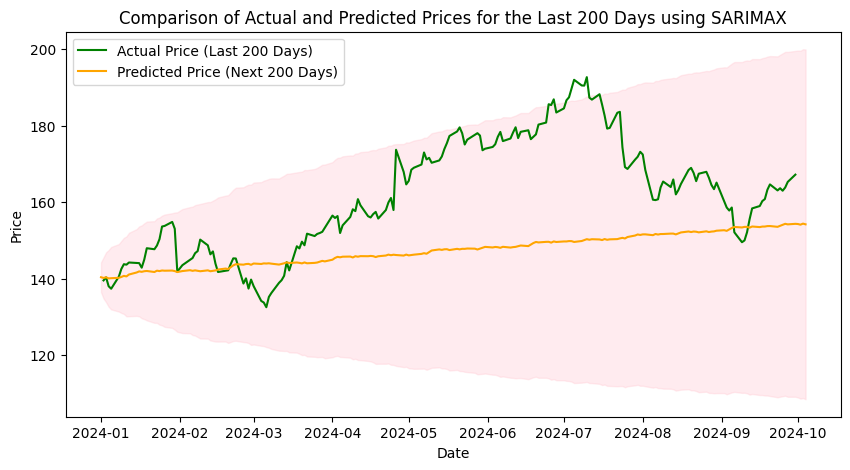

In [224]:
#실제 데이터와 비교 시각화
plt.figure(figsize=(10, 5))
plt.plot(actual_last_200.index, actual_last_200['Close'], label='Actual Price (Last 200 Days)', color='green')

forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=200, freq = 'B')
plt.plot(forecast_index, forecast, label='Predicted Price (Next 200 Days)', color='orange')

plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Comparison of Actual and Predicted Prices for the Last 200 Days using SARIMAX')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Prophet

Prophet 모델이란?
https://wikidocs.net/233162

In [225]:
from prophet import Prophet

In [226]:
###Prophet의 경우 ARIMA와 검정 및 전처리 과정이 약간 달라 새로 진행하였으며 보다 정확한 추세 예측을 위해 200일까지 예측하였습니다.###


ticker = 'GOOG'
data = yf.download(ticker, start='2019-01-01', end='2024-01-01')

df = data.reset_index()[['Date', 'Close']]
df.columns = ['ds', 'y']  #Prophet에서는 날짜 컬럼을 'ds', 값 컬럼을 'y'로 설정해야 함
df

[*********************100%***********************]  1 of 1 completed


,ds,y
0,2019-01-02,52.292500
1,2019-01-03,50.803001
2,2019-01-04,53.535500
3,2019-01-07,53.419498
4,2019-01-08,53.813999
...,...,...
1253,2023-12-22,142.720001
1254,2023-12-26,142.820007
1255,2023-12-27,141.440002
1256,2023-12-28,141.279999


In [227]:
#모델 설정(파라미터는 따로 설정하지 않고 진행했으나 보다 정확한 예측을 위해 수정하는 것도 좋음)
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7zwvj7j3/gglvccyg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7zwvj7j3/d4nvr2xw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53862', 'data', 'file=/tmp/tmp7zwvj7j3/gglvccyg.json', 'init=/tmp/tmp7zwvj7j3/d4nvr2xw.json', 'output', 'file=/tmp/tmp7zwvj7j3/prophet_modelttmiu7cr/prophet_model-20241008010737.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:07:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:07:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [228]:
#200일간의 예측 진행
future = model.make_future_dataframe(periods=200)
forecast = model.predict(future)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


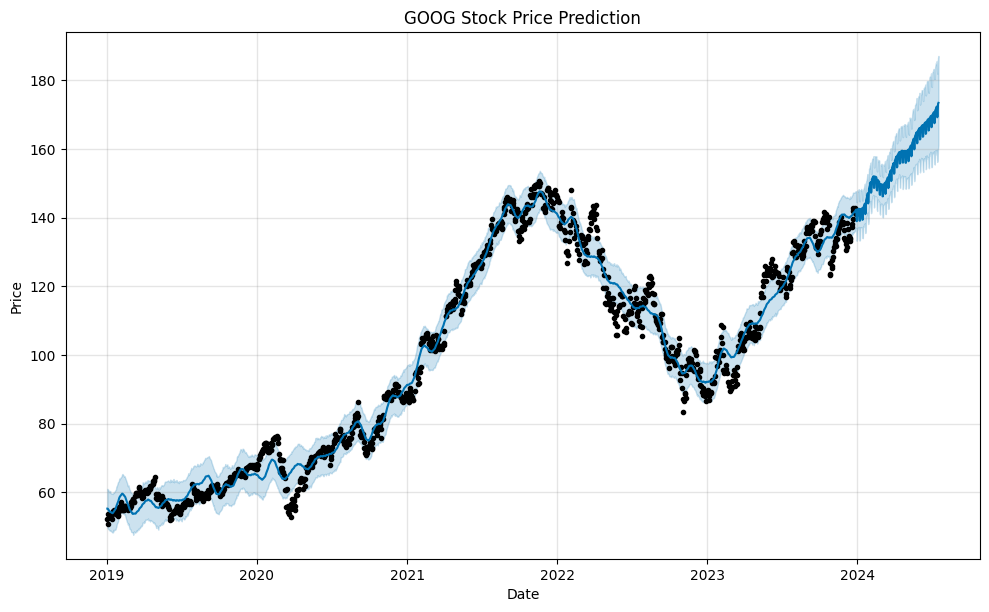

In [229]:
# 예측 결과 시각화
fig1 = model.plot(forecast)
plt.title('GOOG Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

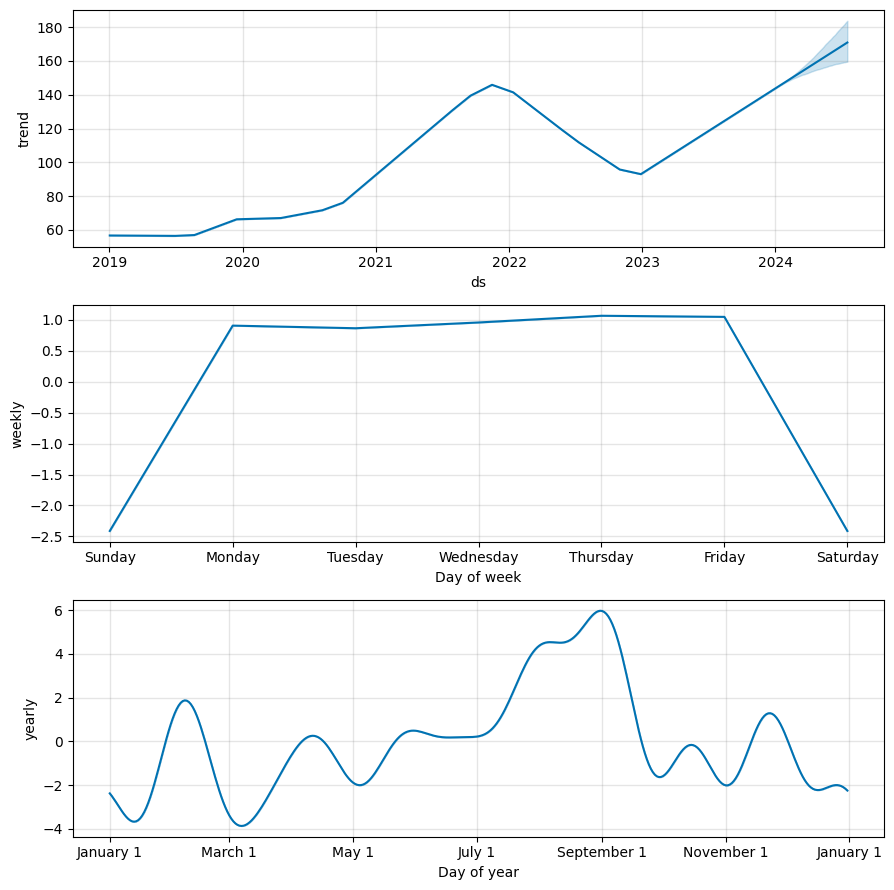

In [230]:
#트렌드 및 주기성 시각화
fig2 = model.plot_components(forecast)
plt.show()

In [231]:
#마지막 200일의 실제 주가 데이터 가져오기
actual_data_last_200 = yf.download(ticker, start='2024-01-01', end='2024-10-01')
actual_last_200 = actual_data_last_200.reset_index()[['Date', 'Close']]
actual_last_200.columns = ['ds', 'y']
actual_data_last_200

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,139.600006,140.615005,137.740005,139.559998,139.218109,20071900
2024-01-03,138.600006,141.089996,138.429993,140.360001,140.016144,18974300
2024-01-04,139.850006,140.634995,138.009995,138.039993,137.701828,18253300
2024-01-05,138.352005,138.809998,136.850006,137.389999,137.053421,15433200
2024-01-08,138.000000,140.639999,137.880005,140.529999,140.185730,17645300
...,...,...,...,...,...,...
2024-09-24,164.250000,164.550003,162.029999,163.639999,163.639999,18774100
2024-09-25,162.970001,164.216995,162.774994,162.990005,162.990005,13607900
2024-09-26,165.029999,165.500000,163.500000,163.830002,163.830002,18234500


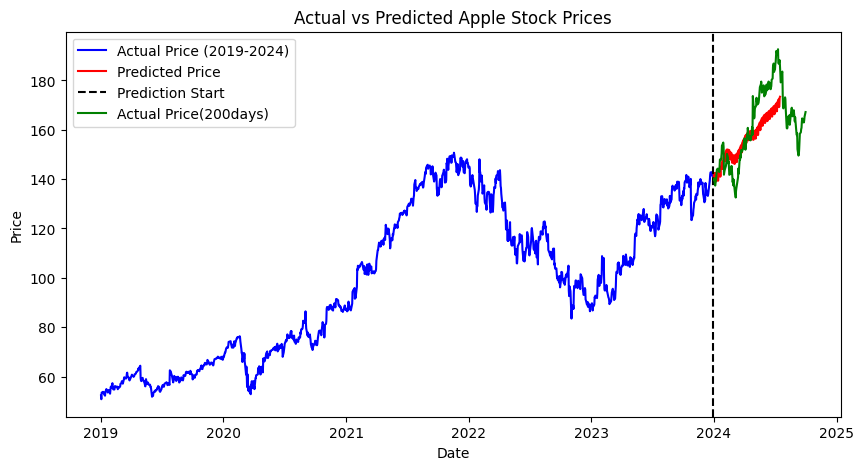

In [233]:
#실제 값과 비교 시각화
plt.figure(figsize=(10, 5))
plt.plot(df['ds'], df['y'], label='Actual Price (2019-2024)', color='blue')

plt.plot(forecast['ds'].iloc[len(df):], forecast['yhat'].iloc[len(df):], label='Predicted Price', color='red') ##전체 예측값 중 200일 이후 것만 사용
plt.axvline(x=df['ds'].iloc[-1], color='black', linestyle='--', label='Prediction Start')
plt.plot(actual_last_200['ds'], actual_last_200['y'], label='Actual Price(200days)', color='green')
plt.title('Actual vs Predicted Apple Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [231]:
₩